In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as  pd
data=pd.read_csv(r'/content/drive/My Drive/PRACTICE/2022SepCustomerProject/Marketing_campaign.csv',sep='\t')

In [3]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis = 1)
    return df

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Fill missing Income values with column mean
    df['Income'] = df['Income'].fillna(df['Income'].mean())
    
    # Date encoding
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
    df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
    df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
    df = df.drop('Dt_Customer', axis=1)
    
    # One-hot encoding
    for column in ['Education', 'Marital_Status']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Response']
    X = df.drop('Response', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_train.columns)
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [9]:
X_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1747,-1.913598,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,-0.058848,-0.242557,1.899016,-0.670921,0.670017,0.444401,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.709950,1.395822,-0.304439,-0.157596,-1.003834,2.242938,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
115,-0.573780,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,-0.676671,-0.627602,-0.309914,-0.151413,-0.725185,-0.562565,-0.848420,0.297986,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.994437,-0.726802,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1739,0.179867,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,-0.676671,-0.531341,-0.774952,-0.670921,-1.073985,-0.898221,-0.848420,1.110581,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.278925,-0.391651,-0.304439,-0.157596,-1.003834,-0.445844,1.865476,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
336,-0.071349,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,0.631660,1.682671,-0.251784,-0.670921,2.414019,0.444401,0.065472,-0.514609,-0.267900,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,-0.143514,-0.391651,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
2031,-1.159951,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,0.159207,-0.483210,1.937769,0.368095,1.018818,-0.226910,1.588626,-0.108311,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.278925,1.172388,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.155087,0.841743,-0.818551,0.909806,0.569301,0.764756,1.477772,0.014023,-0.222389,2.308370,1.375848,-0.151413,-0.027584,1.451367,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-1.517709,0.709950,0.613803,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
905,0.682299,1.506086,-0.818551,-0.928565,1.566075,0.565246,1.653148,0.975520,2.848553,-0.386949,3.836673,-0.670921,-0.376384,0.444401,1.283995,-2.139798,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,0.709950,-1.285388,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1096,-0.908735,1.263423,-0.818551,0.909806,0.191214,0.803467,-0.451367,0.210693,-0.295074,-0.266622,-0.193655,-0.670921,-0.027584,0.108746,-0.239158,-1.733501,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-1.281465,-1.061953,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
235,0.514822,-1.388929,1.038884,-0.928565,0.019356,-0.890882,-0.426313,-0.645914,-0.567643,-0.459145,-0.426173,-0.151413,-0.725185,-0.898221,-0.543789,0.297986,-0.26

In [10]:
y_train

1747    0
115     0
1739    0
336     1
2031    0
       ..
960     0
905     0
1096    0
235     0
1061    0
Name: Response, Length: 1568, dtype: int64

In [11]:
inputs = tf.keras.Input(shape = (X_train.shape[1], ))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy',
                       tf.keras.metrics.AUC(name='auc')])

history = model.fit(X_train, 
                  y_train,
                  validation_split = 0.2,
                  epochs  = 100,
                  callbacks = [
                      tf.keras.callbacks.EarlyStopping(
                      monitor = 'val_loss',
                      patience = 3,
                      restore_best_weights = True)
                  ])

Epoch 1/100
40/40 [==============================] - 2s 13ms/step - loss: 0.3961 - accuracy: 0.8517 - auc: 0.6698 - val_loss: 0.3665 - val_accuracy: 0.8949 - val_auc: 0.8414
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.8979 - auc: 0.8567 - val_loss: 0.3328 - val_accuracy: 0.8917 - val_auc: 0.8801
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2492 - accuracy: 0.9043 - auc: 0.8991 - val_loss: 0.3237 - val_accuracy: 0.8949 - val_auc: 0.8886
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9099 - auc: 0.9287 - val_loss: 0.3249 - val_accuracy: 0.9045 - val_auc: 0.8931
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9155 - auc: 0.9394 - val_loss: 0.3329 - val_accuracy: 0.8981 - val_auc: 0.8949
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9179 - auc: 0.9494 - val_loss: 0.3290 - 

In [12]:
results = model.evaluate(X_test, y_test, verbose = 0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.26682
Test Accuracy: 88.54%
     Test AUC: 0.90643


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


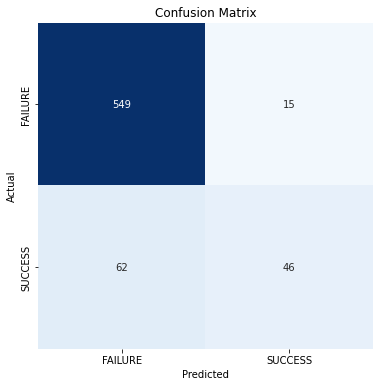

Classification Report:
----------------------
               precision    recall  f1-score   support

     FAILURE       0.90      0.97      0.93       564
     SUCCESS       0.75      0.43      0.54       108

    accuracy                           0.89       672
   macro avg       0.83      0.70      0.74       672
weighted avg       0.88      0.89      0.87       672



In [13]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])


plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks = np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n----------------------\n", clr)